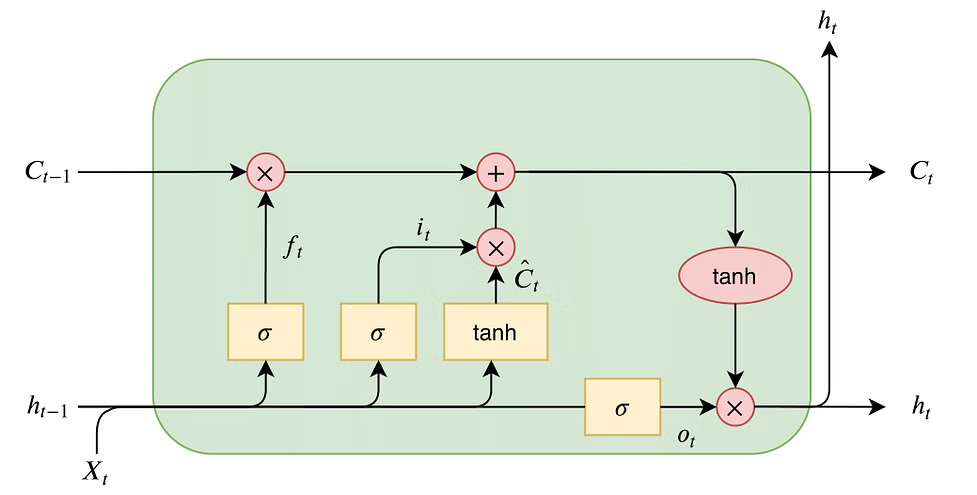

Long short-term memory (LSTM) is a type of recurrent neural network (RNN) aimed at dealing with the vanishing gradient problem present in traditional RNNs

Using an LSTM (Long Short-Term Memory) model to predict returns in Bitcoin is a reasonable approach for several reasons:

1. Handling Time Series Data
Sequential Nature: Bitcoin returns are a time series, where each data point depends on previous data points. LSTMs are specifically designed to handle sequential data and can capture temporal dependencies.
Memory: LSTMs have a memory mechanism that allows them to retain information from previous time steps, which is crucial for modeling the dependencies in time series data like Bitcoin returns.
2. Dealing with Complex Patterns
Non-Linear Relationships: Bitcoin price movements and returns can exhibit complex, non-linear patterns due to market dynamics, investor behavior, and external factors. LSTMs can model these non-linear relationships effectively.
Feature Integration: By integrating various features such as sentiment indicators from Twitter and Reddit, market manipulation signals, and other relevant factors, the LSTM can learn the intricate relationships between these features and the Bitcoin returns.
3. Flexibility and Adaptability
Feature Engineering: The model can handle multiple input features, making it flexible to incorporate various types of data that may impact Bitcoin prices.
Adaptability: LSTMs can adapt to new patterns over time, making them suitable for dynamic and volatile markets like cryptocurrencies.
4. Addressing Overfitting
Dropout Regularization: The use of dropout layers helps in preventing overfitting by randomly setting a fraction of input units to zero during training. This ensures that the model generalizes well to unseen data.
5. Performance Metrics
Mean Squared Error (MSE): Using MSE as the loss function helps in minimizing the error between predicted and actual returns, providing a direct measure of prediction accuracy.
Key Components of the Code
Data Cleaning and Preparation:

Handling missing values and ensuring that the 'date' column is correctly parsed are crucial for maintaining data integrity.
Dropping rows with any NaN values ensures that the dataset is clean and ready for modeling.
Train-Test Split:

Splitting the data based on a cutoff date helps in creating a realistic scenario where past data (training set) is used to predict future data (test set).
Normalization:

Scaling the features ensures that all input data is on a similar scale, which helps in faster convergence during training and prevents the model from being biased towards features with larger magnitudes.
Model Architecture:

The architecture with multiple LSTM layers and dropout layers helps in capturing complex temporal patterns while preventing overfitting.
Model Training and Evaluation:

Training the model with a validation split allows monitoring of the model's performance on unseen data during training.
Evaluating the model using MSE provides a clear metric to assess prediction accuracy.
Practical Considerations
Volatility: Bitcoin is known for its high volatility, and while LSTMs can capture patterns, the unpredictable nature of the market might still pose challenges.
Feature Selection: The choice of features significantly impacts the model's performance. Including relevant and informative features is essential.
Data Quality: High-quality, clean data is crucial for training an effective model. Any errors or noise in the data can lead to poor model performance.
In summary, using an LSTM model to predict Bitcoin returns leverages its ability to handle sequential data, capture complex patterns, and adapt to new trends, making it a suitable choice for this task. However, careful consideration of feature selection, data quality, and market volatility is necessary for achieving good predictive performance.

# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

pandas and numpy are used for data manipulation and numerical operations.

MinMaxScaler from sklearn is used to normalize the data.

mean_squared_error from sklearn is used to evaluate the model's performance.

Sequential, LSTM, Dense, and Dropout from tensorflow.keras are used to build and train the LSTM neural network model.

# 2. Data Cleaning Function

In [ ]:
def clean_data(df):
    print("Initial data preview:")
    print(df.head())

    # Replace non-numeric error strings with NaN
    df = df.replace('Err:502', np.nan)
    print("\nData after replacing 'Err:502' with NaN:")
    print(df.head())

    # Ensure 'date' column is parsed correctly
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("\nData after date conversion:")
    print(df.head())

    # Drop rows with any NaN values
    df = df.dropna()
    print("\nData after dropping rows with NaN values:")
    print(df.head())

    return df

This function takes a DataFrame df and performs the following steps:
Prints the initial few rows of the DataFrame.
Replaces any occurrences of the string 'Err:502' with NaN.
Converts the 'date' column to a datetime object, coercing any errors to NaT.
Drops any rows containing NaN values.
Prints the DataFrame at each step for verification.

3. Train-Test Split Function

In [ ]:
def custom_train_test_split(df, cutoff_date, target_column_name='returns', features=None):
    if features is None:
        features = df.columns.tolist()

    # Ensure 'date' column is present
    if 'date' not in df.columns:
        raise KeyError("Column 'date' not found in DataFrame.")

    train_df = df[df['date'] <= cutoff_date]
    test_df = df[df['date'] > cutoff_date]

    X_train = train_df[features].drop(columns=['date'])  # Exclude 'date' column for now
    y_train = train_df[target_column_name]
    X_test = test_df[features].drop(columns=['date'])   # Exclude 'date' column for now
    y_test = test_df[target_column_name]

    return X_train, y_train, X_test, y_test

This function splits the DataFrame df into training and testing sets based on a cutoff_date.
If features is not provided, it defaults to all columns.
It checks if the 'date' column exists.
It splits the data into training and testing sets based on the cutoff date.
It separates the features (X) and the target variable (y).

# 4. Loading Data

In [ ]:
df = pd.read_excel('/content/augmento_btc_returns.xlsx')
print(f"Initial data range: {df['date'].min()} to {df['date'].max()}")

Loads data from an Excel file into a DataFrame.
Prints the range of dates in the data.

# 5. Cleaning Data

In [ ]:
df_clean = clean_data(df)
print(f"\nCleaned data range: {df_clean['date'].min()} to {df_clean['date'].max()}")

Cleans the data using the clean_data function.
Prints the range of dates in the cleaned data.

# 6. Splitting Data

In [ ]:
target_column = 'returns'
cutoff_date = pd.to_datetime('2023-01-01')
features = df_clean.columns.tolist()

X_train, y_train, X_test, y_test = custom_train_test_split(df_clean, cutoff_date, target_column, features)
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of testing samples: {X_test.shape[0]}')

Sets the target column for prediction.
Defines the cutoff date for splitting the data.
Uses the custom_train_test_split function to split the data into training and testing sets.
Prints the number of samples in the training and testing sets.

# 7. Normalization

In [ ]:
if X_train.shape[0] > 0:
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    y_train = np.array(y_train, dtype=np.float32)
    y_test = np.array(y_test, dtype=np.float32)

    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    print(f"X_train_scaled dtype: {X_train_scaled.dtype}")
    print(f"y_train dtype: {y_train.dtype}")
    print(f"X_test_scaled dtype: {X_test_scaled.dtype}")
    print(f"y_test dtype: {y_test.dtype}")

If the training set is not empty, the features are normalized using MinMaxScaler.

The target variables y_train and y_test are converted to numpy arrays of type float32.

The feature arrays X_train_scaled and X_test_scaled are reshaped to 3D for LSTM input.

Prints the data types of the scaled features and target variables for verification.

# 8. Building and Training the LSTM Model

In [ ]:
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)

Builds an LSTM model using the Sequential API.

Adds LSTM layers with Dropout for regularization.

Compiles the model with the Adam optimizer and mean squared error loss function.

Trains the model on the training data with a validation split of 20%, for 50 epochs and a batch size of 32.

# 9. Evaluating the Model

In [ ]:
    predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    print(f'Mean Squared Error: {mse}')
else:
    print("Training set is empty. Please adjust the cutoff date or check the data.")

Makes predictions on the test set.

Computes the mean squared error between the actual and predicted values.

Prints the mean squared error.

If the training set is empty, prints a message to check the cutoff date or data.